In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import scale

def svm_random(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    Data_random=Data_train.sample(n=500)
    X_train = Data_random.drop(['class'],axis = 1)
    y_train = Data_random['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    pp+=1
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
  plt.title("misclassification graph for random")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

def loss(f,z):
  if f*z>1:
    return 0
  else:
    return (1-f*z)
def markovsampling(df):
  linear_model = SVC(kernel='linear')
  
  
  T=5
  N=len(df)
  rsample = df[0:0]
  t=0
  while t<T:
    sample = df[0:0]
    dtr=df.copy()
    X_train = dtr.drop(['class'],axis = 1)
    y_train = dtr['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    kvalmax=5
    kval=0
    m0=0
    m1=0
    zt=dtr.sample(n=1)
    ztl=zt.to_numpy()
    id=len(sample)
    sample = sample.append(pd.DataFrame(ztl,index=[id+1],columns=sample.columns))
    dtr=dtr.drop(zt.index)
    yl=zt['class'].to_numpy()
    yt=yl[0]
    if yt==-1:
      m0+=1
    else:
      m1+=1
    ydt=linear_model.predict(zt.drop(['class'],axis = 1))
    
    i=0
    while i<N and len(dtr)>0:
      id=len(sample)
      zst=dtr.sample(n=1)
      zstl=zst.to_numpy()
      dtr=dtr.drop(zst.index)
      ysl=zst['class'].to_numpy()
      yst=ysl[0]
      ydst=linear_model.predict(zst.drop(['class'],axis = 1))
      pr=math.exp(-loss(ydst,ydst))/math.exp(-loss(ydt,yt))
      if pr==1 and yt==-1 and yst==-1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr==1 and yt==1 and yst==1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif (pr==1 and yt*yst==-1) or pr<0:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr>1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif kval==kvalmax:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
        kval=0
      else:
        kval+=1
      zt=zst
      if yst==-1:
       m0+=1
      else:
       m1+=1
    i=i+1
    # print(len(sample))
    X_train = sample.drop(['class'],axis = 1)
    y_train = sample['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    rsample=sample
    t=t+1
  return rsample


def svm_markov(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    dtr=Data_train.sample(n=500)
    dtr.reset_index(drop=True, inplace=True)  
    Data_markov=markovsampling(dtr)
    # print(Data_markov.shape)
    X_train = Data_markov.drop(['class'],axis = 1)
    y_train = Data_markov['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
    pp+=1
  plt.title("misclassification graph for markov")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

In [3]:
#importing dataset of letter recognisation

Datam=pd.read_csv("/content/Magic.csv")

Datal = pd.read_csv("/content/letter-recognition.csv")
Datal=Datal.rename({'letter': 'class'}, axis=1)

Datam = Datam.sample(frac=1,random_state=42).reset_index(drop=True)
Datam=Datam.drop(['Unnamed: 0'],axis = 1)

print("Magic data set")
Datam




Magic data set


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,h
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,g
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,g
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,h
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,h
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,g
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,g
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,g
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,g


In [4]:
print("letter-recognition data set")
Datal

letter-recognition data set


,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:

Datal=Datal.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M'],1)
Datal=Datal.replace(['N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],-1)


#printing letters in order
m=len(Datam['class'])
count0=0
for i in range(m):
  # print(Datam['letter'][i])
  if ord(Datam['class'][i])==ord('g'):
    # label.append(1)
    Datam['class'][i]=1
    count0+=1
  else:
    if ord(Datam['class'][i])==ord('h'):
    # label.append(-1) 
     Datam['class'][i]=-1  
print(count0)
Datam


Data_trainm=Datam.sample(frac=0.666667)
Data_trainl=Datal.sample(frac=0.666667)
Data_testm = Datam.drop(Data_trainm.index)
Data_testl= Datal.drop(Data_trainl.index)
# Data_train=Data_train.sample(n=2000,replace='False')
print(Data_trainm.shape)
Data_trainm




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


12332
(12680, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
17930,173.9607,70.6821,3.6840,0.2145,0.1017,-129.6466,-158.1627,-25.6595,41.9359,364.5721,-1
16222,90.9536,23.7516,3.4208,0.1655,0.0837,32.9665,77.8088,-16.6045,5.7787,278.8660,1
12603,18.5389,10.1402,2.2923,0.6276,0.3138,3.1107,-9.8429,-6.0326,42.4560,148.1560,-1
3952,34.4067,15.9890,2.9423,0.3130,0.1799,-6.4452,18.3329,-7.4337,7.1660,160.9230,1
12770,32.4832,20.0252,2.4836,0.3711,0.1921,17.5165,-12.1209,-12.5134,24.2600,132.9170,1
...,...,...,...,...,...,...,...,...,...,...,...
16196,26.8260,16.5478,2.8119,0.3639,0.2074,12.7770,16.4399,5.3518,1.7070,179.8080,1
13743,116.1240,48.2858,4.2843,0.0760,0.0412,-96.5409,87.5921,32.2708,3.3250,298.1160,1
14666,21.7760,12.7202,2.3560,0.6344,0.3722,8.4346,15.5208,-9.1862,22.3655,120.0760,1
3807,46.5588,28.6929,3.3971,0.1864,0.0996,17.6816,46.0987,10.2050,12.7270,107.7470,1


In [6]:
print(Data_trainl.shape)
Data_trainl

(13333, 17)


,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
1390,1,0,1,0,1,0,7,7,4,4,7,6,8,0,8,0,8
13525,-1,2,3,3,2,1,7,7,2,7,10,5,8,1,8,4,8
12178,1,2,4,3,3,1,4,9,5,6,11,9,11,1,9,2,8
2361,-1,4,8,6,6,6,5,11,2,2,7,8,8,7,11,1,8
5450,1,4,5,6,4,6,6,8,5,3,6,5,8,9,7,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13763,1,3,5,5,8,2,7,6,3,1,6,0,8,2,7,1,8
7062,-1,5,8,6,6,5,8,7,7,4,10,6,7,3,8,3,8
19546,-1,5,10,7,8,6,8,10,7,4,10,4,3,3,11,4,8
1441,-1,4,7,6,5,5,6,7,7,4,7,6,8,3,10,7,9


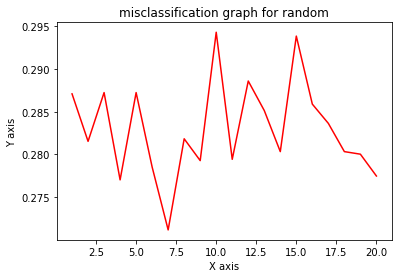

mean misclassification rate for random sample with std for letter (28.299835008249584, 0.5568919768297006)


In [7]:
print("mean misclassification rate for random sample with std for letter",svm_random(Data_trainl,Data_testl))

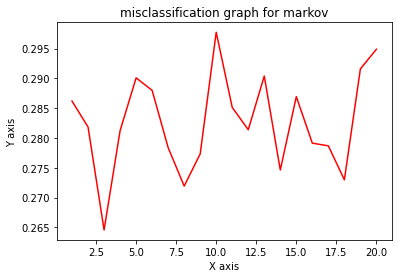

mean misclassification rate for boosted with markov sample with std for letter (28.265336733163338, 0.8109099385031758)


In [8]:
print("mean misclassification rate for boosted with markov sample with std for letter",svm_markov(Data_trainl,Data_testl))

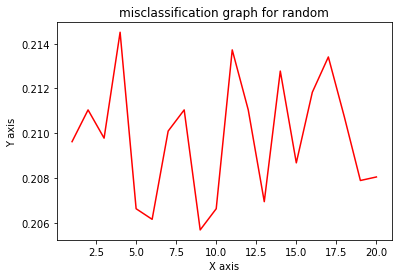

mean misclassification rate for random sample with std for magic (20.98107255520505, 0.2605915006695697)


In [9]:
print("mean misclassification rate for random sample with std for magic",svm_random(Data_trainm,Data_testm))